# Instrument: `Oscilloscope`

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from start import start

scope = start('Sampling Scope DSA8300')
# scope = start('Slow Scope DPO4032')
# scope = start('Real Time Scope TDS6154C')

It is alive
TEKTRONIX,DSA8300,C040232,CF:91.1CT FV:6.3.1.3
Here is what to test:
startup
acquire
wfmDb
run
histogramStats


22.11896509818E-6 and [72.4    97.1125 99.9375]


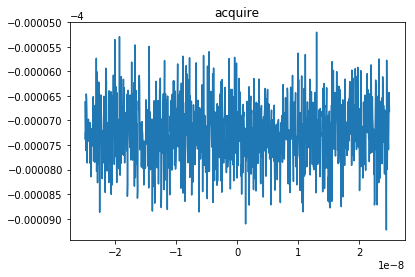

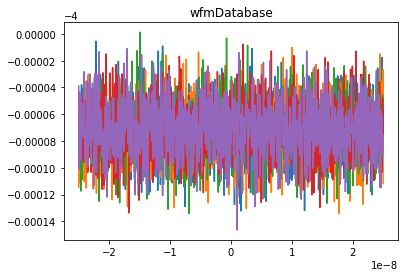

In [2]:
chan = 1
scope.acquire([chan], avgCnt=10, duration=None, position=None, nPts=None)[0].simplePlot()
plt.title('acquire')

if 'DSA' in scope.name:
    stddev, pdf = scope.histogramStats(chan, nWfms=3, untriggered=False)
    print(stddev, 'and', pdf)

if 'DPO' not in scope.name:
    plt.figure()
    bund = scope.wfmDb(chan, nWfms=5)
    bund.simplePlot()
    plt.title('wfmDatabase')
    scope.run()

#### Some error printing tests

In [3]:
# The error should suggest going down to the driver
try:
    scope.getConfigParam
except AttributeError as err:
    print(err.args[0])

Sampling Scope DSA8300 has no attribute getConfigParam
It looks like you are trying to access a low-level attribute
Use ".driver.getConfigParam" to get it


In [4]:
try:
    scope.histogramStats
except AttributeError as err:
    print(err.args[0])
else:
    print('This scope implements histogramStats')


This scope implements histogramStats
